<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Sources" data-toc-modified-id="Sources-0.1">Sources</a></span></li></ul></li><li><span><a href="#1.Text-Data" data-toc-modified-id="1.Text-Data-1">1.Text Data</a></span><ul class="toc-item"><li><span><a href="#1.1-EDA" data-toc-modified-id="1.1-EDA-1.1">1.1 EDA</a></span><ul class="toc-item"><li><span><a href="#1.1.1-Variable-Catégories" data-toc-modified-id="1.1.1-Variable-Catégories-1.1.1">1.1.1 Variable Catégories</a></span></li><li><span><a href="#1.1.2-Variables-Descriptions" data-toc-modified-id="1.1.2-Variables-Descriptions-1.1.2">1.1.2 Variables Descriptions</a></span></li></ul></li><li><span><a href="#1.2-Preprocessing" data-toc-modified-id="1.2-Preprocessing-1.2">1.2 Preprocessing</a></span><ul class="toc-item"><li><span><a href="#1.2.1-Fonction-de-tokenization" data-toc-modified-id="1.2.1-Fonction-de-tokenization-1.2.1">1.2.1 Fonction de tokenization</a></span></li></ul></li><li><span><a href="#1.3-Méthode-BoW" data-toc-modified-id="1.3-Méthode-BoW-1.3">1.3 Méthode BoW</a></span></li><li><span><a href="#1.4-Méthode-Tf-idf" data-toc-modified-id="1.4-Méthode-Tf-idf-1.4">1.4 Méthode Tf-idf</a></span></li><li><span><a href="#1.5-Méthode-BoW-LDA" data-toc-modified-id="1.5-Méthode-BoW-LDA-1.5">1.5 Méthode BoW-LDA</a></span></li><li><span><a href="#1.6-Méthode-Tf-idf_NMF" data-toc-modified-id="1.6-Méthode-Tf-idf_NMF-1.6">1.6 Méthode Tf-idf_NMF</a></span></li></ul></li><li><span><a href="#2.-Image-Data" data-toc-modified-id="2.-Image-Data-2">2. Image Data</a></span><ul class="toc-item"><li><span><a href="#2.1-Bag-Of-Visual-Words-(BOVW)" data-toc-modified-id="2.1-Bag-Of-Visual-Words-(BOVW)-2.1">2.1 Bag Of Visual Words (BOVW)</a></span></li><li><span><a href="#2.2-Transfer-Learning" data-toc-modified-id="2.2-Transfer-Learning-2.2">2.2 Transfer Learning</a></span></li></ul></li><li><span><a href="#3.-Résultats" data-toc-modified-id="3.-Résultats-3">3. Résultats</a></span><ul class="toc-item"><li><span><a href="#3.1-ARI" data-toc-modified-id="3.1-ARI-3.1">3.1 ARI</a></span></li><li><span><a href="#3.2-Matrice-de-confusion" data-toc-modified-id="3.2-Matrice-de-confusion-3.2">3.2 Matrice de confusion</a></span></li><li><span><a href="#3.3-Plot-2D" data-toc-modified-id="3.3-Plot-2D-3.3">3.3 Plot 2D</a></span></li><li><span><a href="#3.4-Affichage-des-images-sur-la-projection-t-SNE" data-toc-modified-id="3.4-Affichage-des-images-sur-la-projection-t-SNE-3.4">3.4 Affichage des images sur la projection t-SNE</a></span></li></ul></li></ul></div>

## Sources

Multi-label Text Classification with Scikit-learn and Tensorflow

https://www.kaggle.com/rodsaldanha/multilabel-category-prediction

https://medium.com/swlh/multi-label-text-classification-with-scikit-learn-and-tensorflow-257f9ee30536

A Complete Exploratory Data Analysis and Visualization for Text Data

https://towardsdatascience.com/a-complete-exploratory-data-analysis-and-visualization-for-text-data-29fb1b96fb6a

Open-source tool InfraNodus.Com

https://towardsdatascience.com/word-clouds-without-context-3a71b6dc3e2d

Text Preprocessing in Python: Steps, Tools, and Examples

https://medium.com/@datamonsters/text-preprocessing-in-python-steps-tools-and-examples-bf025f872908

NLP for Beginners: Cleaning & Preprocessing Text Data

https://towardsdatascience.com/nlp-for-beginners-cleaning-preprocessing-text-data-ae8e306bef0f

Getting started with Text Preprocessing

https://www.kaggle.com/sudalairajkumar/getting-started-with-text-preprocessing

Text Data Preprocessing - KDNuggets

https://www.kdnuggets.com/2018/03/text-data-preprocessing-walkthrough-python.html

How to cluster images based on visual similarity
Use a pre-trained neural network for feature extraction and cluster images using K-means.

https://towardsdatascience.com/how-to-cluster-images-based-on-visual-similarity-cd6e7209fe34

Topic Modeling and Latent Dirichlet Allocation (LDA) in Python

Topic modeling is a type of statistical modeling for discovering the abstract “topics” that occur in a collection of documents. Latent Dirichlet Allocation (LDA) is an example of topic model and is used to classify text in a document to a particular topic. It builds a topic per document model and words per topic model, modeled as Dirichlet distributions.

https://towardsdatascience.com/topic-modeling-and-latent-dirichlet-allocation-in-python-9bf156893c24

Non-Negative Matrix Factorization (NMF)

This factorization can be used for example for dimensionality reduction, source separation or topic extraction.

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.NMF.html

Introduction to Word Embedding and Word2Vec
they are vector representations of a particular word, Word embedding is one of the most popular representation of document vocabulary. It is capable of capturing context of a word in a document, semantic and syntactic similarity, relation with other words, etc.

https://towardsdatascience.com/introduction-to-word-embedding-and-word2vec-652d0c2060fa

Universal Sentence Encoder, Tensor Flow

https://www.tensorflow.org/hub/tutorials/semantic_similarity_with_tf_hub_universal_encoder

A Detailed Guide to the Powerful SIFT Technique for Image Matching (with Python code)

https://www.analyticsvidhya.com/blog/2019/10/detailed-guide-powerful-sift-technique-image-matching-python/

Topic modeling visualization – How to present the results of LDA models?

https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/

LDA in Python – How to grid search best topic models?

https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/

Bag of Visual Words(BoVW)

https://medium.com/@aybukeyalcinerr/bag-of-visual-words-bovw-db9500331b2f

An overview of topics extraction in Python with LDA (bon schéma)

https://towardsdatascience.com/the-complete-guide-for-topics-extraction-in-python-a6aaa6cedbbc

Topic Modeling using NMF and LDA using sklearn

https://shravan-kuchkula.github.io/topic-modeling/#data-gathering-and-normalization

Contextual Topic Identification - Identifying meaningful topics for sparse Steam reviews

https://blog.insightdatascience.com/contextual-topic-identification-4291d256a032


# 1.Text Data

In [1]:
# Packages courants
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from pylab import figure, text, scatter, show
import os
from os import listdir
import re

# Traitement d'images
import cv2 
from PIL import Image, ImageOps
from PIL import ImageFilter
from glob import glob
from PIL import Image as PImage
import matplotlib.image as mpimg

# Keras 
from keras.preprocessing.image import load_img 
from keras.preprocessing.image import img_to_array 
from keras.applications.vgg16 import preprocess_input 
from keras.applications.vgg16 import VGG16 
from keras.models import Model

Using TensorFlow backend.
C:\Users\valen\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\valen\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\valen\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users

In [2]:
# Lecture du dataset
df = pd.read_csv(r"C:\Users\valen\Desktop\Formation Data Scientist\P6\Données\Flipkart\flipkart_com-ecommerce_sample_1050.csv", )

In [4]:
df.head(1)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."


In [5]:
# Ajout de la variable "product_name" à "description"
df['description'] = df['description'] + df['product_name']

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  1050 non-null   object 
 1   crawl_timestamp          1050 non-null   object 
 2   product_url              1050 non-null   object 
 3   product_name             1050 non-null   object 
 4   product_category_tree    1050 non-null   object 
 5   pid                      1050 non-null   object 
 6   retail_price             1049 non-null   float64
 7   discounted_price         1049 non-null   float64
 8   image                    1050 non-null   object 
 9   is_FK_Advantage_product  1050 non-null   bool   
 10  description              1050 non-null   object 
 11  product_rating           1050 non-null   object 
 12  overall_rating           1050 non-null   object 
 13  brand                    712 non-null    object 
 14  product_specifications  

In [7]:
print(df.loc[0:3,:])

                            uniq_id            crawl_timestamp  \
0  55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000   
1  7b72c92c2f6c40268628ec5f14c6d590  2016-04-30 03:22:56 +0000   
2  64d5d4a258243731dc7bbb1eef49ad74  2016-04-30 03:22:56 +0000   
3  d4684dcdc759dd9cdf41504698d737d8  2016-06-20 08:49:52 +0000   

                                         product_url  \
0  http://www.flipkart.com/elegance-polyester-mul...   
1  http://www.flipkart.com/sathiyas-cotton-bath-t...   
2  http://www.flipkart.com/eurospa-cotton-terry-f...   
3  http://www.flipkart.com/santosh-royal-fashion-...   

                                        product_name  \
0  Elegance Polyester Multicolor Abstract Eyelet ...   
1                         Sathiyas Cotton Bath Towel   
2                Eurospa Cotton Terry Face Towel Set   
3  SANTOSH ROYAL FASHION Cotton Printed King size...   

                               product_category_tree               pid  \
0  ["Home Furnishing >> Curtains 

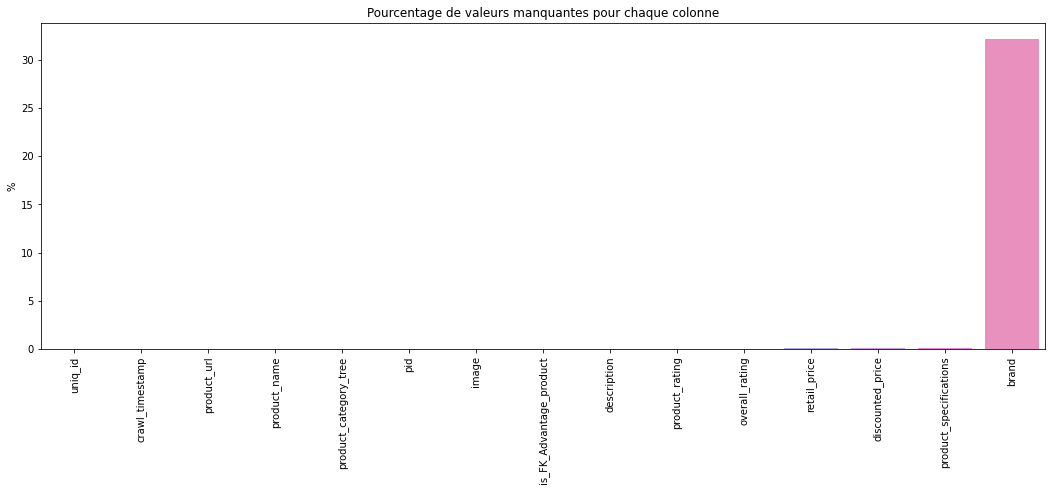

In [8]:
# Calcul des valeurs manquantes
null_prop = df.isna().sum(axis=0).sort_values()/len(df)*100

# Affiche la proportion de données manquants par colonne
fig = plt.figure(figsize=(18, 6))
sns.barplot(x=null_prop.index, y=null_prop.values)
plt.ylabel("%")
plt.title("Pourcentage de valeurs manquantes pour chaque colonne")
plt.style.use('ggplot')
plt.xticks(rotation=90)
plt.show()

In [9]:
# Travail sur les variables description et catégorie
description_category = df[['product_category_tree','description']]
description_category['product_category_tree'] = description_category['product_category_tree'].apply(lambda x: x.split(' >> '))
print(description_category.shape)
description_category.head()

(1050, 2)


C:\Users\valen\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,product_category_tree,description
0,"[[""Home Furnishing, Curtains & Accessories, Cu...",Key Features of Elegance Polyester Multicolor ...
1,"[[""Baby Care, Baby Bath & Skin, Baby Bath Towe...",Specifications of Sathiyas Cotton Bath Towel (...
2,"[[""Baby Care, Baby Bath & Skin, Baby Bath Towe...",Key Features of Eurospa Cotton Terry Face Towe...
3,"[[""Home Furnishing, Bed Linen, Bedsheets, SANT...",Key Features of SANTOSH ROYAL FASHION Cotton P...
4,"[[""Home Furnishing, Bed Linen, Bedsheets, Jaip...",Key Features of Jaipur Print Cotton Floral Kin...


In [10]:
# Extracation des catégories
columns = ['category_1', 'category_2', 'category_3']
cat = description_category['product_category_tree'].to_list()
cat = pd.DataFrame(cat)
cat = cat.loc[:,0:2]
cat.columns = columns

cat["category_1"] = [re.sub(r'[\[\"\]]', '',w.strip()) for w in cat["category_1"]]
cat["category_2"] = [re.sub(r'[\[\"\]]', '',w.strip()) for w in cat["category_2"]]
cat["category_2"] = [re.sub(r'[\[\"\]]', '',str(w).strip()) for w in cat["category_2"]]

In [12]:
print(cat.shape)
cat.head(5)

(1050, 3)


,category_1,category_2,category_3
0,Home Furnishing,Curtains & Accessories,Curtains
1,Baby Care,Baby Bath & Skin,Baby Bath Towels
2,Baby Care,Baby Bath & Skin,Baby Bath Towels
3,Home Furnishing,Bed Linen,Bedsheets
4,Home Furnishing,Bed Linen,Bedsheets


In [13]:
cat.category_1.nunique()

7

In [14]:
cat.category_2.nunique()

62

In [15]:
cat.category_3.nunique()

246

In [16]:
cat.drop(columns = ['category_3'], inplace = True)
data = cat.join(description_category['description'])
data = data.rename({"category_1":"categories", 'description':'text_data'})
print(data.shape)
data.head(5)

(1050, 3)


,category_1,category_2,description
0,Home Furnishing,Curtains & Accessories,Key Features of Elegance Polyester Multicolor ...
1,Baby Care,Baby Bath & Skin,Specifications of Sathiyas Cotton Bath Towel (...
2,Baby Care,Baby Bath & Skin,Key Features of Eurospa Cotton Terry Face Towe...
3,Home Furnishing,Bed Linen,Key Features of SANTOSH ROYAL FASHION Cotton P...
4,Home Furnishing,Bed Linen,Key Features of Jaipur Print Cotton Floral Kin...


## 1.1 EDA

### 1.1.1 Variable Catégories

In [17]:
# Nombre de produits par catégories
def plot(data):
    bar_plot = pd.DataFrame()
    bar_plot['category'] = data.value_counts().index
    bar_plot['count'] = data.value_counts().values
    bar_plot.reset_index(inplace=True, drop=True)
    print(bar_plot.head(10))

    x = list(data.value_counts().index)
    y = data.value_counts().values

    threshold = 10

    plt.figure(figsize=(15,8))
    sns.set(font_scale = 1.5)
    sns.set_style('whitegrid')

    plt.title("Répartition des catégories", fontsize=24)
    plt.ylabel("Nombre d'articles", fontsize=18)
    plt.xlabel('Catégorie', fontsize=18)
    plt.xticks(rotation='vertical', fontsize=12)
    sns.barplot(x, y)

    plt.show()

                     category  count
0    Beauty and Personal Care    150
1             Home Furnishing    150
2                   Baby Care    150
3            Kitchen & Dining    150
4                     Watches    150
5                   Computers    150
6  Home Decor & Festive Needs    150


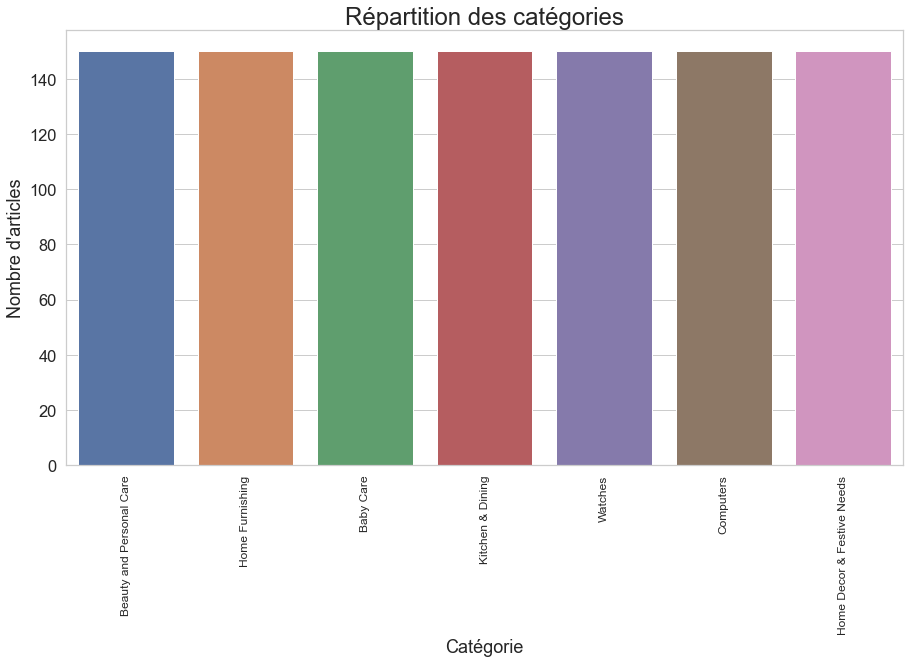

In [18]:
plot(data['category_1'])

                    category  count
0              Wrist Watches    149
1         Laptop Accessories     87
2                Infant Wear     84
3                Coffee Mugs     74
4                 Showpieces     71
5                  Bed Linen     65
6                 Fragrances     65
7         Network Components     49
8                   Cookware     27
9  Table Decor & Handicrafts     27


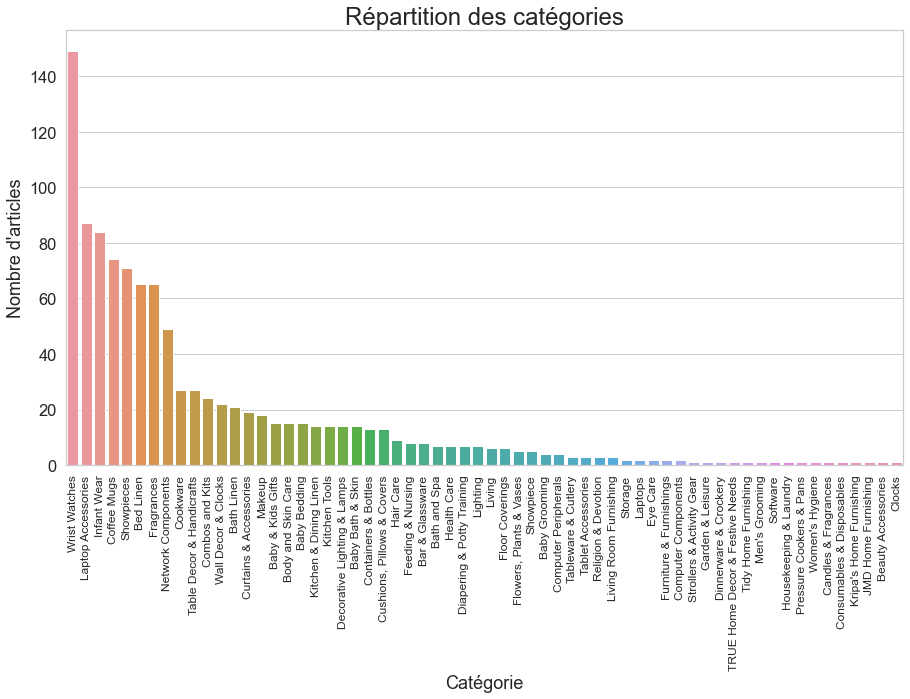

In [19]:
plot(cat['category_2'])

La répartition des catégories de la première branche est homogène. Il y a 150 produits par catégories donc seulement ces catégories sont retenues.

### 1.1.2 Variables Descriptions

In [20]:
data.head(5)

,category_1,category_2,description
0,Home Furnishing,Curtains & Accessories,Key Features of Elegance Polyester Multicolor ...
1,Baby Care,Baby Bath & Skin,Specifications of Sathiyas Cotton Bath Towel (...
2,Baby Care,Baby Bath & Skin,Key Features of Eurospa Cotton Terry Face Towe...
3,Home Furnishing,Bed Linen,Key Features of SANTOSH ROYAL FASHION Cotton P...
4,Home Furnishing,Bed Linen,Key Features of Jaipur Print Cotton Floral Kin...


In [21]:
boxplot = description_category.copy()
boxplot['len'] = description_category.description.apply(lambda x: len(x))
boxplot.head(3)

,product_category_tree,description,len
0,"[[""Home Furnishing, Curtains & Accessories, Cu...",Key Features of Elegance Polyester Multicolor ...,1478
1,"[[""Baby Care, Baby Bath & Skin, Baby Bath Towe...",Specifications of Sathiyas Cotton Bath Towel (...,470
2,"[[""Baby Care, Baby Bath & Skin, Baby Bath Towe...",Key Features of Eurospa Cotton Terry Face Towe...,1293


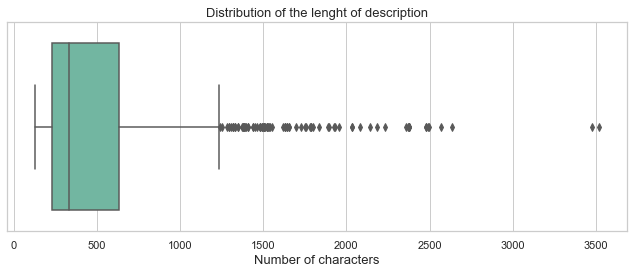

In [22]:
# Boxplot de la distribution des longueurs des descriptions produit
sns.set(style="whitegrid",rc={"font.size":13,"axes.labelsize":13})

plt.figure(figsize=(9, 4))

ax = sns.boxplot(x='len', data=boxplot, orient="h", palette="Set2")
plt.ylabel('')
plt.xlabel('Number of characters')
plt.title("Distribution of the lenght of description", fontsize=13)
plt.tight_layout(h_pad=3)

Une description de produit contient environ entre 250 et 600 caractères.

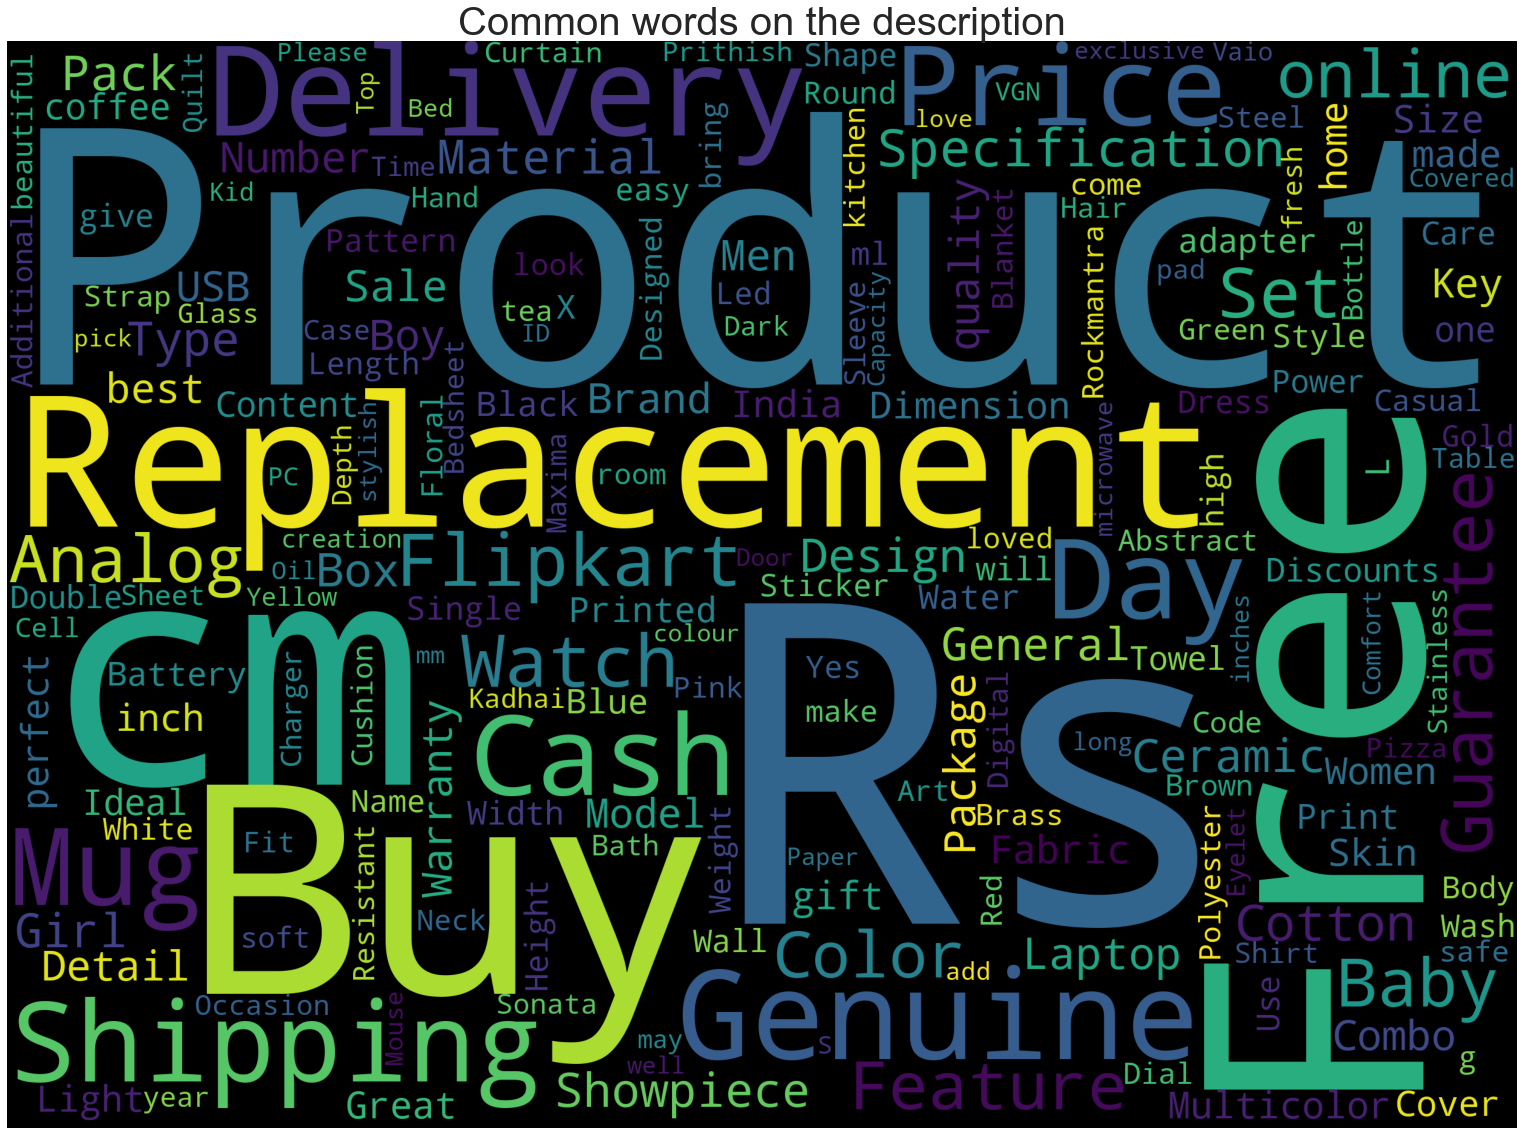

In [23]:
# Visualisation des mots les plus utilisés dans les descriptions
from wordcloud import WordCloud, STOPWORDS

plt.figure(figsize=(30, 20))
text = description_category.description.values

cloud = WordCloud(
    stopwords=STOPWORDS,
    background_color='black',
    collocations=False,
    width=2500,
    height=1800
).generate(" ".join(text))

plt.axis('off')
plt.title("Common words on the description", fontsize=40)
plt.imshow(cloud)

## 1.2 Preprocessing

La première étape consiste à convertir les phrases de chaque description en tokens ou mots individuels.
Ces tokens subissent plusieurs traitements : retrait de la ponctuation, mise en minuscule, retrait des caractères spéciaux,...

L'étape suivante consiste à créer un dictionnaire contenant tous les mots de notre corpus sous forme de clés et la fréquence d'occurrence des mots en tant que valeurs. En d'autres termes, nous devons créer un histogramme des mots de notre corpus de texte.

In [24]:
# Texte test
test = data.loc[0,:]['description']
print(test)

Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a bright and modernistic appeal with these designs. The surreal attention is sure to steal hearts. These contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty given by the soothing prints. Bring home the elegant curtain that softly filters light in your room so that you 

### 1.2.1 Fonction de tokenization

In [25]:
from nltk.tokenize import RegexpTokenizer
def tokenizer(text):
    """Tokenize a text into tokens"""
    tokenizer = RegexpTokenizer('\w+')
    tokens = tokenizer.tokenize(text)
    return tokens

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

import unicodedata 
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    # American Standard Code for Information Interchange
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

import inflect
def replace_numbers(words):
    """Replace all integer occurrences in list of tokenized words with textual representation"""
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

def no_alphabetic_removal(words):
    """Remove all tokens that are not alphabetic from list of tokenized words"""
    new_words = []
    for word in words:
        if word.isalpha():
            new_words.append(word)
    return new_words

import nltk
from nltk.corpus import stopwords
def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords.words('english'):
            new_words.append(word)
    return new_words

from nltk.stem.snowball import SnowballStemmer
def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = SnowballStemmer("english")
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems

from nltk.stem import WordNetLemmatizer 
def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

def preprocessor(words):
    words = tokenizer(words)
    words = to_lowercase(words)
    words = remove_non_ascii(words)
    words = remove_punctuation(words)
    words = no_alphabetic_removal(words)
    words = remove_stopwords(words)
    words = stem_words(words)
    words = lemmatize_verbs(words)
    return words

In [26]:
# Validation du test
print(len(preprocessor(test)))
preprocessor(test)

157


['key',
 'featur',
 'eleg',
 'polyest',
 'multicolor',
 'abstract',
 'eyelet',
 'door',
 'curtain',
 'floral',
 'curtain',
 'eleg',
 'polyest',
 'multicolor',
 'abstract',
 'eyelet',
 'door',
 'curtain',
 'cm',
 'height',
 'pack',
 'price',
 'rs',
 'curtain',
 'enhanc',
 'look',
 'interior',
 'curtain',
 'make',
 'high',
 'qualiti',
 'polyest',
 'fabric',
 'featur',
 'eyelet',
 'style',
 'stitch',
 'metal',
 'ring',
 'make',
 'room',
 'environ',
 'romant',
 'love',
 'curtain',
 'ant',
 'wrinkl',
 'anti',
 'shrinkag',
 'eleg',
 'appar',
 'give',
 'home',
 'bright',
 'modernist',
 'appeal',
 'design',
 'surreal',
 'attent',
 'sure',
 'steal',
 'heart',
 'contemporari',
 'eyelet',
 'valanc',
 'curtain',
 'slide',
 'smooth',
 'draw',
 'apart',
 'first',
 'thing',
 'morn',
 'welcom',
 'bright',
 'sun',
 'ray',
 'want',
 'wish',
 'good',
 'morn',
 'whole',
 'world',
 'draw',
 'close',
 'even',
 'creat',
 'special',
 'moment',
 'joyous',
 'beauti',
 'give',
 'sooth',
 'print',
 'bring',
 'hom

## 1.3 Méthode BoW

In [27]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Vectorisation
countvectorizer = CountVectorizer(stop_words='english',
                                  tokenizer=preprocessor,
                                  token_pattern='[a-zA-Z0-9]{3,}',
                                  max_features=1500,  # most occurring words as features 
                                  min_df=5,           # minimum number of documents that should contain a feature
                                  max_df=0.7)         # include only those words that occur in a maximum of 70% of all the documents

In [28]:
# Dataframe sous forme de Bag of Words
df_cv_vectorized = countvectorizer.fit_transform(data['description'])
tokens = countvectorizer.get_feature_names()
df_cv_vectorized = pd.DataFrame(df_cv_vectorized.toarray(), columns=tokens)
print(df_cv_vectorized.shape)
df_cv_vectorized.head(3)

C:\Users\valen\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:386: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['afterward', 'alon', 'alreadi', 'alway', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becom', 'besid', 'cri', 'describ', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'make', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'otherwis', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


(1050, 875)


,absorb,abstract,ac,accessori,actual,adapt,add,addit,adhes,adida,...,women,wood,wooden,work,world,wrap,x,year,yellow,yes
0,0,5,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,2,1
2,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0


Nous avons donc ici notre matrice creuse issu du corpus de texte (ensemble des descriptions produits). Chaque produit (chaque ligne) est représenté suivant la fréquence d'apparition d'un token. 875 tokens ont été retenus.
Cette matrice est traité par un KMeans clustering. Le vecteur contenant les étiquettes de clusters est ensuite comparé aux étiquettes via la métrique ARI.

Cette métrique permet de comparer la similarité de forme de deux clusterings.

In [29]:
# Dictionnaires de résultats
ARI = {}
grid_search_dict = {}
results = {}

In [30]:
# Hyperparamètres pour les modèles ensemblistes d'arbres de regression
param_grid = {
    'vectoriser__max_df': (0.5, 0.75, 1.0),
    'vectoriser__max_features': (1000, 1500, 2000),
    'vectoriser__ngram_range': ((1, 1), (1, 2)),  # unigrams or bigrams
                    }

In [31]:
from sklearn.cluster import KMeans

# Modèle de clustering
clusterer = KMeans(init='k-means++', 
                   n_clusters=data['category_1'].nunique(), 
                   max_iter=1000,
                   random_state=10)

In [32]:
# Pipeline assemblage du vectoriser et du clusterer
def define_pipeline(vectoriser, clusterer):

    pipeline = Pipeline(steps=[('vectoriser', vectoriser),
                               ('clusterer', clusterer)
                               ])

    return pipeline

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
    
# Définition du modèle 
model = define_pipeline(countvectorizer, clusterer) 

# Définition de la procédure d'évaluation
cv = KFold(n_splits=10, shuffle=True)

# Définition de la procédure RandomizedSearchCV 
grid_search = RandomizedSearchCV(model, 
                                 param_grid, 
                                 scoring='adjusted_rand_score', 
                                 cv=cv, 
                                 n_jobs=-1, 
                                 n_iter=100,
                                 random_state=42)

# Execution de la grid search
grid_search.fit(data["description"].values.astype('U'), data['category_1'])

# Le meilleur score est enregistré dans le dictionnaire des scores
ARI["Text_BoW"] = grid_search.best_score_

# Conservation du grid search
grid_search_dict["Text_BoW"] = grid_search.best_estimator_
results["Text_BoW"] = grid_search.best_estimator_.transform(data["description"].values.astype('U'))

print("Adjusted Rand Score : {}".format(ARI["Text_BoW"]))
print("Les meilleurs paramètres sont : {}".format(grid_search.best_params_))

C:\Users\valen\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:282: UserWarning: The total space of parameters 18 is smaller than n_iter=100. Running 18 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
C:\Users\valen\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:386: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['afterward', 'alon', 'alreadi', 'alway', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becom', 'besid', 'cri', 'describ', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'make', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'otherwis', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'thenc', 'thereaft', 

Adjusted Rand Score : 0.1673913547413492
Les meilleurs paramètres sont : {'vectoriser__ngram_range': (1, 2), 'vectoriser__max_features': 1000, 'vectoriser__max_df': 0.5}


## 1.4 Méthode Tf-idf 

TF-IDF: Term Frequency and Inverse Dense Frequency Techniques

TF-IDF est une méthode proche de Bag of Words. Cette méthode a pour principe que la fréquence élévée d'un token ne peut être en mesure de fournir beaucoup de gain d'information. Donc les mots rares donnent plus de poids au modèle.

TF = number of times the term appears in a document/total number of words in the document
TF = nombre de fois où un terme apparaît dans un document
IDF = log(nombre de documents/nombre de documents où un terme apparaît)

TF-IDF calcule le nombre de fois qu'un mot apparaît dans chaque document, cependant la fréquence diminue si le mot apparaît dans d'autres documents. Par conséquent, un mot n'est pas particulièrement important pour un document spécifique si il est également apparu dans d'autres documents.

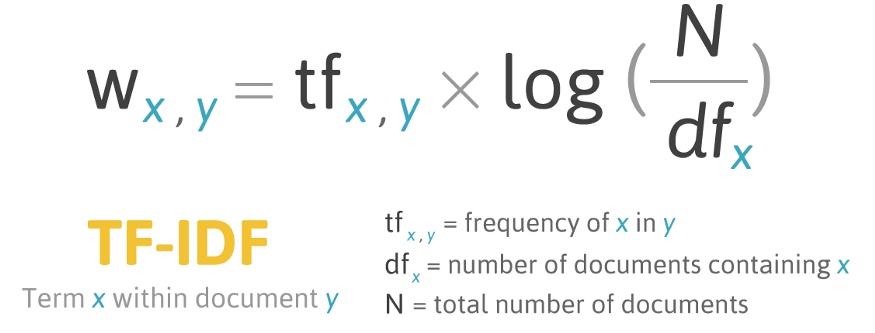

In [34]:
# Vectorisation
tfidfvectorizer = TfidfVectorizer(max_features=1500,
                                  min_df=5,
                                  max_df=0.7,
                                  stop_words=stopwords.words(
                                      'english'),
                                  tokenizer=preprocessor,
                                  token_pattern='[a-zA-Z0-9]{3,}')


In [35]:
# Dataframe sous forme de Bag of Words
df_tfidf_vectorized = tfidfvectorizer.fit_transform(data['description'])
tokens = tfidfvectorizer.get_feature_names()
df_tfidf_vectorized = pd.DataFrame(df_tfidf_vectorized.toarray(), columns=tokens)
print(df_tfidf_vectorized.shape)
df_tfidf_vectorized.head(3)

(1050, 916)


,absorb,abstract,ac,accessori,actual,adapt,add,addit,adhes,adida,...,wooden,work,world,would,wrap,x,year,yellow,yes,yet
0,0.000000,0.212454,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.056021,0.0,0.0,0.000000,0.000000,0.000000,0.0000,0.0
1,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.182944,0.0725,0.0
2,0.059126,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.040233,0.045134,0.000000,0.0000,0.0


In [36]:
# Définition du modèle 
model = define_pipeline(tfidfvectorizer, clusterer) 

# Définition de la procédure d'évaluation
cv = KFold(n_splits=10, shuffle=True)

# Définition de la procédure RandomizedSearchCV 
grid_search = RandomizedSearchCV(model, 
                                 param_grid, 
                                 scoring='adjusted_rand_score', 
                                 cv=cv, 
                                 n_jobs=-1, 
                                 n_iter=100,
                                 random_state=42)

# Execution de la grid search
grid_search.fit(data["description"].values.astype('U'), data['category_1'])

# Le meilleur score est enregistré dans le dictionnaire des scores
ARI["Text_Tfidf"] = grid_search.best_score_

# Conservation du grid search
grid_search_dict["Text_Tfidf"] = grid_search.best_estimator_
results["Text_Tfidf"] = grid_search.best_estimator_.transform(data["description"].values.astype('U'))

print("Adjusted Rand Score : {}".format(ARI["Text_Tfidf"]))
print("Les meilleurs paramètres sont : {}".format(grid_search.best_params_))

C:\Users\valen\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:282: UserWarning: The total space of parameters 18 is smaller than n_iter=100. Running 18 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


Adjusted Rand Score : 0.309437950186714
Les meilleurs paramètres sont : {'vectoriser__ngram_range': (1, 2), 'vectoriser__max_features': 1000, 'vectoriser__max_df': 0.75}


## 1.5 Méthode BoW-LDA

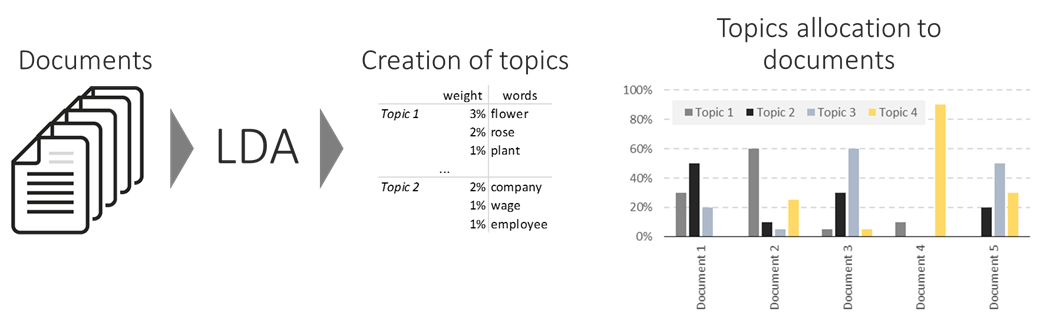

In [37]:
# Pipeline assemblage du vectoriser et du clusterer
def define_pipeline(vectoriser, lda, clusterer):

    pipeline = Pipeline(steps=[('vectoriser', vectoriser),
                               ('lda', lda),
                               ('clusterer', clusterer)
                               ])

    return pipeline

In [38]:
from sklearn.decomposition import LatentDirichletAllocation

# Build LDA Model
lda = LatentDirichletAllocation(n_components=len(data['category_1'].unique()),           # Number of topics
                                max_iter=10,               # Max learning iterations
                                learning_method='online',
                                random_state=100,          # Random state
                                batch_size=128,            # n docs in each learning iter
                                evaluate_every=-1,       # compute perplexity every n iters, default: Don't
                                n_jobs=-1,               # Use all available CPUs
                                )

In [39]:
# Hyperparamètres pour les modèles ensemblistes d'arbres de regression
param_grid = {
    'vectoriser__max_df': (0.5, 1.0),
    'vectoriser__max_features': (1000, 2000),
    'lda__learning_decay': [0.3, .5, .9]
                    }

In [40]:
# Définition du modèle 
model = define_pipeline(countvectorizer, lda, clusterer) 

# Définition de la procédure d'évaluation
cv = KFold(n_splits=10, shuffle=True)

# Définition de la procédure RandomizedSearchCV 
grid_search = RandomizedSearchCV(model, 
                                 param_grid, 
                                 scoring='adjusted_rand_score', 
                                 cv=cv, 
                                 n_jobs=-1, 
                                 n_iter=100,
                                 random_state=42)

# Execution de la grid search
grid_search.fit(data["description"].values.astype('U'), data['category_1'])

# Le meilleur score est enregistré dans le dictionnaire des scores
ARI["Text_BoW_LDA"] = grid_search.best_score_

# Conservation du grid search
grid_search_dict["Text_BoW_LDA"] = grid_search.best_estimator_
results["Text_BoW_LDA"] = grid_search.best_estimator_.transform(data["description"].values.astype('U'))

print("Adjusted Rand Score : {}".format(ARI["Text_BoW_LDA"]))
print("Les meilleurs paramètres sont : {}".format(grid_search.best_params_))

C:\Users\valen\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:282: UserWarning: The total space of parameters 12 is smaller than n_iter=100. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
C:\Users\valen\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:386: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['afterward', 'alon', 'alreadi', 'alway', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becom', 'besid', 'cri', 'describ', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'make', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'otherwis', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'thenc', 'thereaft', 

Adjusted Rand Score : 0.31572310230523765
Les meilleurs paramètres sont : {'vectoriser__max_features': 2000, 'vectoriser__max_df': 0.5, 'lda__learning_decay': 0.3}


In [41]:
# Best Model
best_lda_model = grid_search_dict["Text_BoW_LDA"]

# Create Document - Topic Matrix
lda_output = best_lda_model.transform(df_cv_vectorized)
print(lda_output.shape)

# column names
topicnames = ["Topic " + str(i) for i in range(lda_output.shape[1])]

# index names
docnames = ["Doc " + str(i) for i in range(lda_output.shape[0])]

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)

# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

(875, 7)


In [42]:
df_document_topic.head()

,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,dominant_topic
Doc 0,0.69,0.92,0.70,0.64,0.11,0.79,0.81,1
Doc 1,0.72,0.92,0.77,0.16,0.72,0.79,0.86,1
Doc 2,0.73,0.87,0.11,0.66,0.63,0.78,0.81,1
Doc 3,0.64,0.92,0.76,0.71,0.71,0.80,0.18,1
Doc 4,0.73,0.92,0.76,0.69,0.72,0.19,0.86,1


Matrice de distribution de chaque mot (875 mots issus de la matrice BOW) - probabilité d'occurence d'un mot dans un topic.

In [43]:
df_document_topic.shape

(875, 8)

In [44]:
# Show top n keywords for each topic
def show_topics(vectorizer, topic_array, n_words=10):
    keywords = np.array(countvectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in topic_array:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    df_topic_keywords = pd.DataFrame(topic_keywords)
    df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
    df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
    return df_topic_keywords.head()

In [45]:
show_topics(vectorizer=countvectorizer, topic_array=lda_output, n_words=10)

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6
Topic 0,abstract,add,adapt,ac,absorb,accessori,actual
Topic 1,abstract,add,adapt,ac,absorb,actual,accessori
Topic 2,abstract,add,adapt,absorb,accessori,actual,ac
Topic 3,abstract,adapt,ac,accessori,actual,absorb,add
Topic 4,abstract,add,ac,absorb,actual,accessori,adapt


## 1.6 Méthode Tf-idf_NMF

In [46]:
# Pipeline assemblage du vectoriser et du clusterer
def define_pipeline(vectoriser, nmf, clusterer):

    pipeline = Pipeline(steps=[('vectoriser', vectoriser),
                               ('nmf', nmf),
                               ('clusterer', clusterer)
                               ])

    return pipeline

In [47]:
from sklearn.decomposition import NMF

#obtain a NMF model.
nmf = NMF(n_components=len(data['category_1'].unique()), init='nndsvd', solver="mu")
#fit the model
nmf.fit_transform(df_tfidf_vectorized)

C:\Users\valen\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:229: UserWarning: The multiplicative update ('mu') solver cannot update zeros present in the initialization, and so leads to poorer results when used jointly with init='nndsvd'. You may try init='nndsvda' or init='nndsvdar' instead.
  UserWarning)


array([[3.15537104e-30, 1.92957241e-21, 1.48905116e-02, ...,
        0.00000000e+00, 7.44709005e-02, 6.91225164e-02],
       [2.01315465e-05, 1.04120396e-21, 4.95517970e-02, ...,
        0.00000000e+00, 2.20422160e-01, 0.00000000e+00],
       [8.62053595e-10, 2.54322627e-03, 3.72908850e-02, ...,
        0.00000000e+00, 1.66490213e-01, 3.83700502e-02],
       ...,
       [7.39315295e-03, 2.86561294e-02, 0.00000000e+00, ...,
        5.55391537e-04, 7.84968576e-03, 0.00000000e+00],
       [5.61770011e-03, 2.30635202e-02, 0.00000000e+00, ...,
        0.00000000e+00, 8.70454060e-03, 0.00000000e+00],
       [9.26721030e-03, 3.43744753e-02, 0.00000000e+00, ...,
        6.80359069e-04, 9.96348903e-03, 0.00000000e+00]])

In [48]:
# Hyperparamètres pour les modèles ensemblistes d'arbres de regression
param_grid = {
    'vectoriser__max_df': (0.5, 1.0),
    'vectoriser__max_features': (1000, 2000),
    'nmf__init': ('random','nndsvdar','custom'),
    'nmf__solver': ('cd','mu'),
                    }

In [49]:
# Définition du modèle 
model = define_pipeline(countvectorizer, nmf, clusterer) 

# Définition de la procédure d'évaluation
cv = KFold(n_splits=10, shuffle=True)

# Définition de la procédure RandomizedSearchCV 
grid_search = RandomizedSearchCV(model, 
                                 param_grid, 
                                 scoring='adjusted_rand_score', 
                                 cv=cv, 
                                 n_jobs=-1, 
                                 n_iter=100,
                                 random_state=42)

# Execution de la grid search
grid_search.fit(data["description"].values.astype('U'), data['category_1'])

# Le meilleur score est enregistré dans le dictionnaire des scores
ARI["Text_Tfidf_NMF"] = grid_search.best_score_

# Conservation du grid search
grid_search_dict["Text_Tfidf_NMF"] = grid_search.best_estimator_
results["Text_Tfidf_NMF"] = grid_search.best_estimator_.transform(data["description"].values.astype('U'))

print("Adjusted Rand Score : {}".format(ARI["Text_Tfidf_NMF"]))
print("Les meilleurs paramètres sont : {}".format(grid_search.best_params_))

C:\Users\valen\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:282: UserWarning: The total space of parameters 24 is smaller than n_iter=100. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
C:\Users\valen\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:386: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['afterward', 'alon', 'alreadi', 'alway', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becom', 'besid', 'cri', 'describ', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'make', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'otherwis', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'thenc', 'thereaft', 

Adjusted Rand Score : 0.18189527963106297
Les meilleurs paramètres sont : {'vectoriser__max_features': 1000, 'vectoriser__max_df': 1.0, 'nmf__solver': 'cd', 'nmf__init': 'nndsvdar'}


In [50]:
# Best Model
best_nmf_model = grid_search_dict["Text_Tfidf_NMF"]

# Create Document - Topic Matrix
nmf_output = best_nmf_model.transform(df_tfidf_vectorized)
print(nmf_output.shape)

# column names
topicnames = ["Topic " + str(i) for i in range(nmf_output.shape[1])]

# index names
docnames = ["Doc " + str(i) for i in range(nmf_output.shape[0])]

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(nmf_output, 2), columns=topicnames, index=docnames)

# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

(916, 7)


In [51]:
df_document_topic.head()

,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,dominant_topic
Doc 0,1.06,0.39,1.32,2.39,3.36,0.31,0.64,4
Doc 1,1.06,0.39,1.32,2.39,3.36,0.31,0.64,4
Doc 2,1.06,0.39,1.32,2.39,3.36,0.31,0.64,4
Doc 3,1.06,0.39,1.32,2.39,3.36,0.31,0.64,4
Doc 4,1.06,0.39,1.32,2.39,3.36,0.31,0.64,4


In [52]:
show_topics(vectorizer=tfidfvectorizer, topic_array=nmf_output, n_words=10)

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6
Topic 0,actual,accessori,ac,absorb,add,abstract,adapt
Topic 1,actual,accessori,ac,absorb,add,abstract,adapt
Topic 2,actual,accessori,ac,absorb,add,abstract,adapt
Topic 3,actual,accessori,ac,absorb,add,abstract,adapt
Topic 4,actual,accessori,ac,absorb,add,abstract,adapt


# 2. Image Data

## 2.1 Bag Of Visual Words (BOVW)

In [53]:
# Extraction des catégories de produits
data = df[['product_category_tree', 'image']]
print(data.head(2))

data['product_category_tree'] = data['product_category_tree'].apply(lambda x: x.split(' >> '))
columns = ['category_1', 'category_2', 'category_3']
cat = data['product_category_tree'].to_list()
cat = pd.DataFrame(cat)
cat = cat.loc[:,0:2]
cat.columns = columns
cat["category_1"] = [re.sub(r'[\[\"\]]', '',w.strip()) for w in cat["category_1"]]
cat = cat.drop(columns = ['category_2', 'category_3'])
data = cat.join(data['image'])

# Les catégories utilisés pour la résolution du problème de segmentation
categories = data["category_1"]

                               product_category_tree  \
0  ["Home Furnishing >> Curtains & Accessories >>...   
1  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...   

                                  image  
0  55b85ea15a1536d46b7190ad6fff8ce7.jpg  
1  7b72c92c2f6c40268628ec5f14c6d590.jpg  


C:\Users\valen\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [54]:
print(data.shape)
data.head()

(1050, 2)


,category_1,image
0,Home Furnishing,55b85ea15a1536d46b7190ad6fff8ce7.jpg
1,Baby Care,7b72c92c2f6c40268628ec5f14c6d590.jpg
2,Baby Care,64d5d4a258243731dc7bbb1eef49ad74.jpg
3,Home Furnishing,d4684dcdc759dd9cdf41504698d737d8.jpg
4,Home Furnishing,6325b6870c54cd47be6ebfbffa620ec7.jpg


In [55]:
path = r"C:/Users/valen/images"

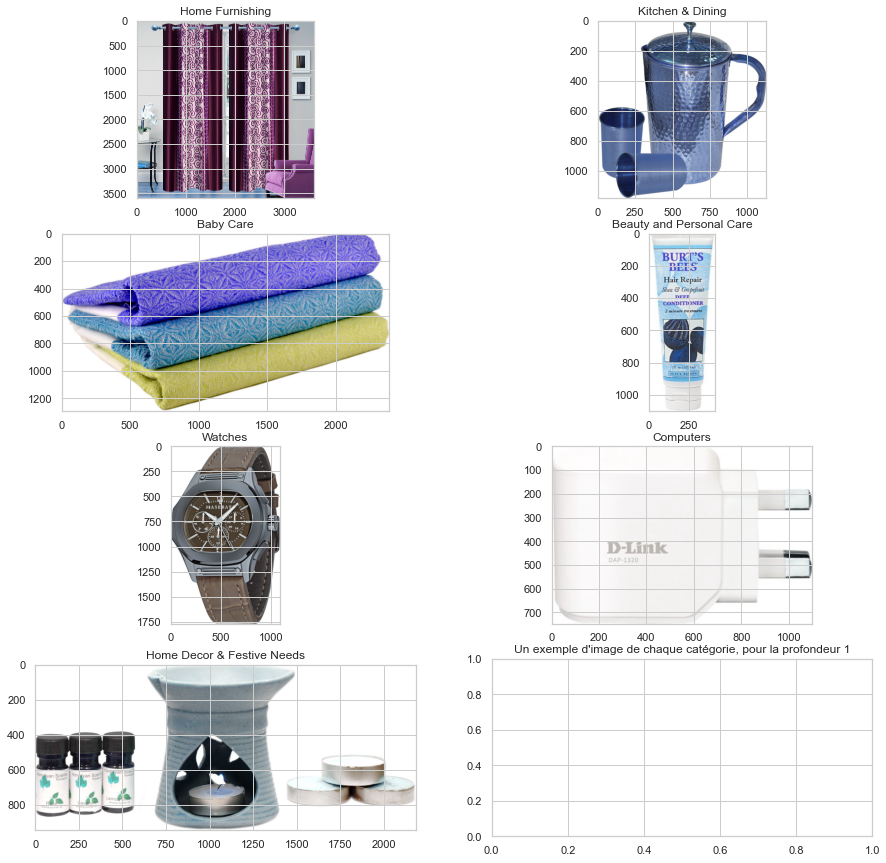

In [56]:
# Exemples d'image par catégories de produit
fig, ax = plt.subplots(4, 2)
fig.set_figheight(15)
fig.set_figwidth(15)

plt.title("Un exemple d'image de chaque catégorie, pour la profondeur 1")

for i, cat in enumerate(categories.unique()) :
    name_image = data[categories == cat]["image"].iloc[0]
    full_path = os.path.join(path, name_image)
    img = cv2.imread(full_path)
    ax[i%4, i//4].set_title(cat)
    ax[i%4, i//4].imshow(img)
    
plt.show()

In [57]:
def resize_to_square(img, size):
    # get image dimensions
    h, w = img.shape[:2]
    
    # dif = max (height, width)
    dif = h if h > w else w
    
    # define interpolation for zooming and shrinkage
    interpolation = cv2.INTER_AREA if dif > size else cv2.INTER_CUBIC    
    
    # for square images
    if h == w: 
        return cv2.resize(img, (size, size), interpolation)
    
    # for non square images
    x_pos = (dif - w)//2
    y_pos = (dif - h)//2
    
    # define mask for both color and back and white images
    if len(img.shape) == 2:
        mask = np.full((dif, dif), 255, dtype=img.dtype)
        mask[y_pos:y_pos+h, x_pos:x_pos+w] = img[:h, :w]
    else:
        mask = np.full((dif, dif, img.shape[2]), 255, dtype=img.dtype)
        mask[y_pos:y_pos+h, x_pos:x_pos+w, :] = img[:h, :w, :]
    
    return cv2.resize(mask, (size, size), interpolation)

clahe = cv2.createCLAHE(clipLimit=1, tileGridSize=(8,8)) 

def traitement_image(img):
    # conversion en noir et blanc
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Redimensionnement
    img_square = resize_to_square(img_gray, 400)
    # Amélioration du contraste
    cl = clahe.apply(img_square)  
    return cl

In [58]:
# Extraction des features de chaque image sous forme de liste
# Get path to all images and save them in a list
# image_paths and the corresponding label in image_paths
images = []
des_list = []
image_path_to_del = []

orb = cv2.ORB_create()

for image_path in data['image']:
    images.append(image_path)
    im = cv2.imread(os.path.join(path, image_path))
    im = traitement_image(im)
    kpts, des = orb.detectAndCompute(im, None)
    if des is not None : # Si descriptor est différent de None
        des_list.append((image_path, des))
    else :
        print("Descriptors of Image {} is None".format(image_path))
        image_path_to_del.append(image_path)

data = data.drop(data[data['image']==image_path_to_del[0]].index)

Descriptors of Image 9743e6d1c9f3180483825fe4d2e97836.jpg is None


In [59]:
# Stack all the descriptors vertically in a numpy array
descriptors = des_list[0][1]
# descriptors = des_list[0]
for image_path, descriptor in des_list[1:] :
# for descriptor in des_list[1:]:
    descriptors = np.vstack((descriptors, descriptor))  

#kmeans works only on float, so convert integers to float
descriptors_float = descriptors.astype(float)  
print(descriptors_float)

[[ 85. 221.  29. ... 250. 161.  49.]
 [126. 146. 224. ... 175.  60. 214.]
 [124.  33. 145. ...  66. 135. 195.]
 ...
 [ 15.  28.  54. ... 231. 105. 149.]
 [ 21.  62.  87. ... 237. 104. 149.]
 [140.  23. 119. ... 207. 117. 243.]]


In [60]:
# Perform k-means clustering and vector quantization
from scipy.cluster.vq import kmeans, vq

'''
    Provides routines for k-means clustering, generating 
    code books from k-means models, and quantizing vectors 
    by comparing them with centroids in a code book.
'''

k = 200  #k means with 200 clusters gives lower accuracy for the aeroplane example
voc, variance = kmeans(descriptors_float, k, 1) 

# Calculate the histogram of features and represent them as vector
# vq Assigns codes from a code book to observations.
im_features = np.zeros((len(data), k), "float32")
for i in range(len(data)):
    words, distance = vq(des_list[i][1],voc)
    for w in words:
        im_features[i][w] += 1

In [61]:
des_list[0]

('55b85ea15a1536d46b7190ad6fff8ce7.jpg',
 array([[ 85, 221,  29, ..., 250, 161,  49],
        [126, 146, 224, ..., 175,  60, 214],
        [124,  33, 145, ...,  66, 135, 195],
        ...,
        [ 96, 160, 151, ...,  34,   7, 170],
        [ 82,  32, 215, ..., 174,  36,  34],
        [108, 164, 189, ...,  88, 198,  98]], dtype=uint8))

In [62]:
descriptors

array([[ 85, 221,  29, ..., 250, 161,  49],
       [126, 146, 224, ..., 175,  60, 214],
       [124,  33, 145, ...,  66, 135, 195],
       ...,
       [ 15,  28,  54, ..., 231, 105, 149],
       [ 21,  62,  87, ..., 237, 104, 149],
       [140,  23, 119, ..., 207, 117, 243]], dtype=uint8)

In [63]:
descriptors.shape

(496568, 32)

In [64]:
n_clusters = [100, 200, 300]

BovW = {}

for n in n_clusters:
    voc, variance = kmeans(descriptors_float, n, 1) 
    print(n)
    
    BovW[n] = np.zeros((len(data), n), "float32")
    for i in range(len(data)):
        words, distance = vq(des_list[i][1],voc)
        for w in words:
            BovW[n][i][w] += 1
    print('BovW ok')

100
BovW ok
200
BovW ok
300
BovW ok


In [65]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler().fit(im_features)        
im_features = scale.transform(im_features)

In [66]:
from sklearn.cluster import KMeans
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn.metrics.cluster import adjusted_rand_score

# Modèle de clustering
clusterer = KMeans(init='k-means++', 
                   n_clusters=data['category_1'].nunique(), 
                   max_iter=1000,
                   random_state=10)

# Définition de la procédure d'évaluation
cv = KFold(n_splits=10, shuffle=True)

ARI_scores = []

for key, value in BovW.items():
    
    scale = StandardScaler().fit(value)        
    im_features = scale.transform(value)
    
    y_pred = cross_val_predict(clusterer,
                               im_features,
                               data['category_1'],
                               cv=cv) 
    
    score = adjusted_rand_score(data['category_1'], y_pred)
    ARI_scores.append(score)    
    print("n : {}, ARI : {}".format(key, score)) 
    
ARI["img_ORB_BOVW"] = max(ARI_scores)
print('ARI max : {}'.format(ARI["img_ORB_BOVW"]))

n : 100, ARI : 0.002590327058884875
n : 200, ARI : 0.004300232861019397
n : 300, ARI : 0.0017871421959332336
ARI max : 0.004300232861019397


In [67]:
list_y_pred = []
ARI_scores = []

for key, value in BovW.items():
    
    scale = StandardScaler().fit(value)        
    im_features = scale.transform(value)
    
    y_pred = cross_val_predict(clusterer,
                               im_features,
                               data['category_1'],
                               cv=cv) 
    list_y_pred.append(y_pred)
    
    score = adjusted_rand_score(data['category_1'], y_pred)
    ARI_scores.append(score)    
    
zipped = list(zip(list_y_pred, ARI_scores))
di = pd.DataFrame(zipped, columns = ['y_pred', 'ARI']) 

In [68]:
# (di[di['ARI'] == max(di['ARI'])]['y_pred']).loc[1]

## 2.2 Transfer Learning

In [69]:
df = pd.read_csv(r"C:\Users\valen\Desktop\Formation Data Scientist\P6\Données\Flipkart\flipkart_com-ecommerce_sample_1050.csv", )
data = df[['product_category_tree', 'image', 'description']]
data['product_category_tree'] = data['product_category_tree'].apply(lambda x: x.split(' >> '))

columns = ['category_1', 'category_2', 'category_3']
cat = data['product_category_tree'].to_list()
cat = pd.DataFrame(cat)
cat = cat.loc[:,0:2]
cat.columns = columns
cat["category_1"] = [re.sub(r'[\[\"\]]', '',w.strip()) for w in cat["category_1"]]
cat = cat.drop(columns = ['category_2', 'category_3'])
data = cat.join(data[['image', 'description']])

# Les catégories utilisés pour la résolution du problème de segmentation
categories = data["category_1"]

C:\Users\valen\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [70]:
path = r"C:/Users/valen/images"
# change the working directory to the path where the images are located
os.chdir(path)

# this list holds all the image filename
images = []

# creates a ScandirIterator aliased as files
with os.scandir(path) as files:
  # loops through each file in the directory
    for file in files:
        if file is not None:
          # adds only the image files to the flowers list
            images.append(file.name)

In [71]:
# load model
model = VGG16()

# remove the output layer
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)

In [72]:
# Résumé du réseau de neurones: détail de chaque couche
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [73]:
def extract_features(file, model):
    
    # load the image as a 224x224 array
    img = load_img(file, target_size=(224,224)) # VGG model expects the images it receives to be 224x224 NumPy arrays
    
    # convert from 'PIL.Image.Image' to numpy array
    img = np.array(img) 
    
    # reshape the data for the model reshape(num_of_samples, dim 1, dim 2, channels)
    reshaped_img = img.reshape(1,224,224,3) 
    
    # prepare image for model
    imgx = preprocess_input(reshaped_img)
    
    # get the feature vector
    features = model.predict(imgx, use_multiprocessing=True)
    return features

In [74]:
dictionary = {}

# lop through each image in the dataset
for image in images:
    # try to extract the features and update the dictionary
    feat = extract_features(image,model)
    dictionary[image] = feat
        
# get a list of the filenames
filenames = np.array(list(dictionary.keys()))

# get a list of just the features
feat = np.array(list(dictionary.values()))
print(feat.shape)

C:\Users\valen\AppData\Local\Continuum\anaconda3\lib\site-packages\PIL\Image.py:2837: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


(1050, 1, 4096)


In [75]:
# reshape so that there are 210 samples of 4096 vectors
feat = feat.reshape(-1,4096)
print(feat.shape)

# get the unique labels (from the flower_labels.csv)
label = data['category_1'].tolist()
unique_labels = list(set(label))

(1050, 4096)


In [76]:
from sklearn.decomposition import PCA
pca = PCA(n_components=300, random_state=22)
pca.fit(feat)

PCA(n_components=300, random_state=22)

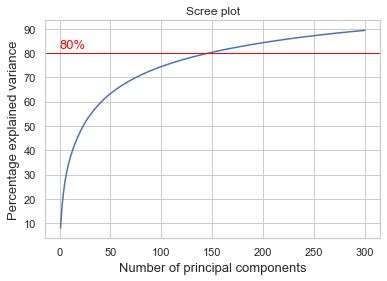

In [77]:
scree = pca.explained_variance_ratio_*100
plt.plot(np.arange(len(scree))+1, scree.cumsum()) #,c="red",marker='o')
plt.xlabel("Number of principal components")
plt.ylabel("Percentage explained variance")
plt.axhline(80, lw=1, c='red')
plt.text(0, 82, '80%', c='red')
plt.title("Scree plot")
plt.show(block=False)

In [78]:
pca = PCA(n_components=150, random_state=22)
pca.fit(feat)
x = pca.transform(feat)

In [79]:
results['img_VGG']=x

In [80]:
print(f"Components before PCA: {feat.shape[1]}")
print(f"Components after PCA: {pca.n_components}")

Components before PCA: 4096
Components after PCA: 150


In [81]:
kmeans = KMeans(n_clusters=len(unique_labels),n_jobs=-1, random_state=22)
kmeans.fit(x)
print((kmeans.labels_).shape)

C:\Users\valen\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:974: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


(1050,)


In [82]:
kmeans.labels_

array([6, 3, 0, ..., 5, 1, 6])

In [83]:
ARI["img_VGG"] = adjusted_rand_score(data['category_1'], kmeans.labels_)

# 3. Résultats

## 3.1 ARI

Text(0.5, 1.0, 'Résultats des différentes méthodologies')

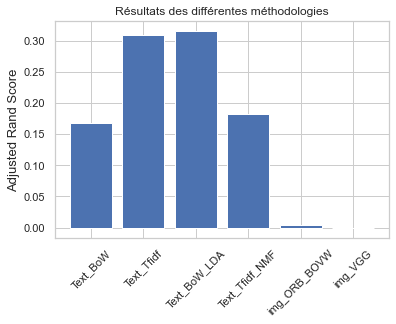

In [84]:
# Bar plot ARI pour tous les modèles
plt.bar(range(len(ARI)), list(ARI.values()), align='center')
plt.xticks(range(len(ARI)), list(ARI.keys()), rotation=45)
plt.ylabel('Adjusted Rand Score')
plt.title("Résultats des différentes méthodologies")

In [85]:
ARI

{'Text_BoW': 0.1673913547413492,
 'Text_Tfidf': 0.309437950186714,
 'Text_BoW_LDA': 0.31572310230523765,
 'Text_Tfidf_NMF': 0.18189527963106297,
 'img_ORB_BOVW': 0.004300232861019397,
 'img_VGG': -0.0012767649998529616}

## 3.2 Matrice de confusion

Matrice de confusion du meilleur modèle

In [86]:
# Clé du dict ARI avec valeur maximale
key_max = max(ARI, key=ARI.get)

In [87]:
data.head()

,category_1,image,description
0,Home Furnishing,55b85ea15a1536d46b7190ad6fff8ce7.jpg,Key Features of Elegance Polyester Multicolor ...
1,Baby Care,7b72c92c2f6c40268628ec5f14c6d590.jpg,Specifications of Sathiyas Cotton Bath Towel (...
2,Baby Care,64d5d4a258243731dc7bbb1eef49ad74.jpg,Key Features of Eurospa Cotton Terry Face Towe...
3,Home Furnishing,d4684dcdc759dd9cdf41504698d737d8.jpg,Key Features of SANTOSH ROYAL FASHION Cotton P...
4,Home Furnishing,6325b6870c54cd47be6ebfbffa620ec7.jpg,Key Features of Jaipur Print Cotton Floral Kin...


index: ['Baby Care' 'Beauty and Personal Care' 'Computers'
 'Home Decor & Festive Needs' 'Home Furnishing' 'Kitchen & Dining'
 'Watches']
columns: range(0, 7)


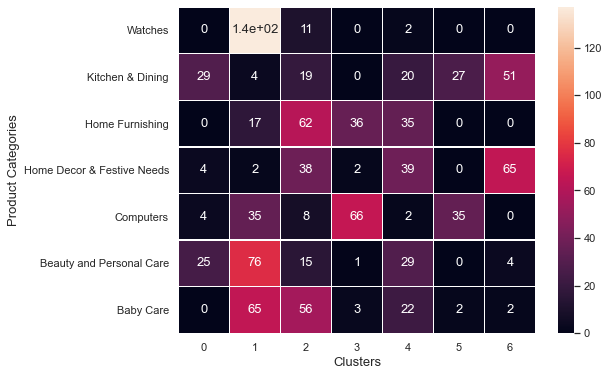

In [88]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

# Les catégories d'images sont encodés numériquement de 0 à 6
cat_encoder = LabelEncoder()
y_true = cat_encoder.fit_transform(data['category_1'])

# Labels prédits par le meilleur algorithme

if key_max in ['Text_BoW', 'Text_Tfidf', 'Text_BoW_LDA', 'Text_Tfidf_NMF']:
    y_pred = grid_search_dict[key_max].predict(data["description"].values.astype('U'))
elif key_max == 'img_ORB_BOVW':
    y_pred = (di[di['ARI'] == max(di['ARI'])]['y_pred']).loc[1]
else:
    y_pred = kmeans.labels_

# Calcul de la Matrice de confusion
mat_conf = confusion_matrix(y_true, y_pred)
# Mise sous forme de DataFrame
mat_conf_df = pd.DataFrame(mat_conf, index=cat_encoder.classes_, columns=range(
    len(data['category_1'].unique())))
print('index: {}'.format(cat_encoder.classes_))
print('columns: {}'.format(range(len(data['category_1'].unique()))))

# Tracage de la matrice de confusion
fig = plt.figure(1, figsize=(8, 6))
sns.heatmap(mat_conf_df, annot=True, linewidths=.3)
plt.ylabel('Product Categories')
plt.xlabel('Clusters')
plt.ylim(0, 7)
plt.show()

In [89]:
from munkres import Munkres

def make_cost_matrix(c1, c2):
    """
    """
    uc1 = np.unique(c1)
    uc2 = np.unique(c2)
    l1 = uc1.size
    l2 = uc2.size
    assert(l1 == l2 and np.all(uc1 == uc2))

    m = np.ones([l1, l2])
    for i in range(l1):
        it_i = np.nonzero(c1 == uc1[i])[0]
        for j in range(l2):
            it_j = np.nonzero(c2 == uc2[j])[0]
            m_ij = np.intersect1d(it_j, it_i)
            m[i,j] =  -m_ij.size
    return m

def translate_clustering(clt, mapper):
    return np.array([ mapper[i] for i in clt ])

def accuracy(cm):
    """computes accuracy from confusion matrix"""
    return np.trace(cm, dtype=float) / np.sum(cm)


classes = y_true # data and true labels
labels = y_pred # performs the algo and get the predicted labels
num_labels = len(np.unique(y_true))

cm = confusion_matrix(classes, labels, labels=range(num_labels)) # gets the confusion matrix

cost_matrix = make_cost_matrix(labels, classes)

m = Munkres()
indexes = m.compute(cost_matrix)
mapper = { old: new for (old, new) in indexes }

new_labels = translate_clustering(labels, mapper)
new_cm = confusion_matrix(classes, new_labels, labels=range(num_labels))

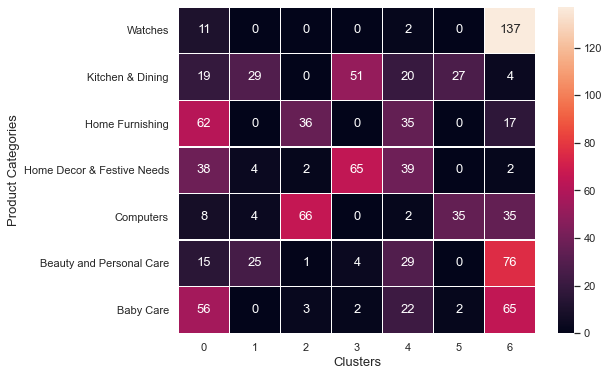

In [90]:
new_cm_df = pd.DataFrame(new_cm, index=cat_encoder.classes_, columns=range(len(data['category_1'].unique())))

# Tracage de la matrice de confusion
fig = plt.figure(1, figsize=(8, 6))
sns.heatmap(new_cm_df, annot=True, linewidths=.3, fmt='d')
plt.ylabel('Product Categories')
plt.xlabel('Clusters')
plt.ylim(0, 7)
plt.show()

If we use (external) classification evalutation measures like F1 or 
accuracy for clustering evaluation, problems may arise. 
One way to fix is to perform label matching.
Here we performs kmeans clustering on the dataset and proceed to use 
the Hungarian (Munkres) algorithm to correct the mismatched labeling. 

https://www.programcreek.com/python/example/90074/munkres.Munkres

https://gist.github.com/siolag161/dc6e42b64e1bde1f263b

Permutation maximizing the sum of the diagonal elements

https://smorbieu.gitlab.io/accuracy-from-classification-to-clustering-evaluation/

## 3.3 Plot 2D

In [91]:
# Pour le meilleur modèle

In [92]:
def plot_digits(X, y_true, min_distance=0.05, images=None, figsize=(50, 40)):
    
    # Let's scale the input features so that they range from 0 to 1
    X_normalized = MinMaxScaler().fit_transform(X)
    
    neighbors = np.array([[10., 10.]])
    plt.figure(figsize=figsize)
    cmap = plt.cm.get_cmap("jet")
    digits = np.unique(y_true)
    for i, digit in enumerate(digits):
        sns.scatterplot(X_normalized[y_true == digit, 0],
                        X_normalized[y_true == digit, 1],
                        c=[cmap(i / 7)],
                        label=digit)
    plt.xlabel("Composante 1")
    plt.ylabel("Composante 2")
    plt.title("Projection 2D par TSNE")
    ax = plt.gcf().gca()  # get current axes in current figure
    for index, image_coord in enumerate(X_normalized):
        closest_distance = np.linalg.norm(np.array(neighbors) - image_coord, axis=1).min()
        if closest_distance > min_distance:
            neighbors = np.r_[neighbors, [image_coord]]
            
    plt.legend()

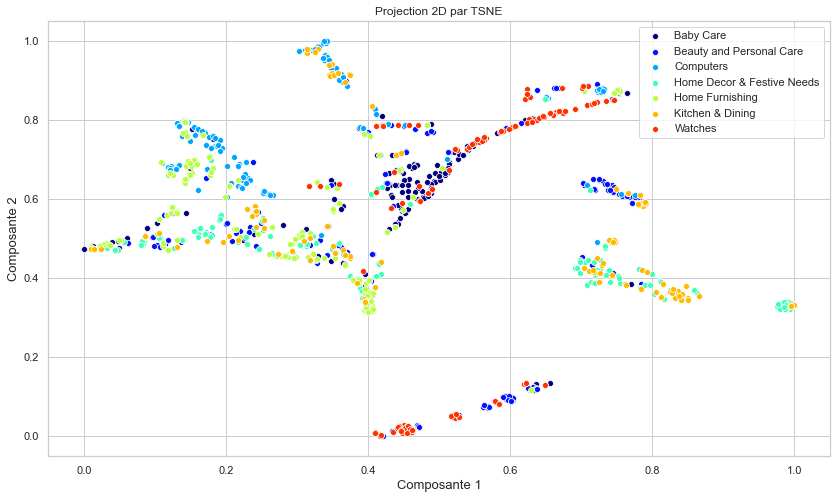

In [94]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE

# Algorithme de TSNE : réduction de dimmensions
tsne = TSNE()
# Transforme l'espace de départ en un espace d'arrivé
# à deux dimmensions
# X_tsne = tsne.fit_transform(results_txt[key_max])
X_tsne = tsne.fit_transform(results[key_max])

plot_digits(X_tsne, data['category_1'].values, figsize=(14, 8))

## 3.4 Affichage des images sur la projection t-SNE

In [99]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [100]:
def plot_embedding(X, images, title=None, zoom=0.5, min_dist=5e-3):
    # recentrage des données
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    fig = plt.figure(figsize=(18, 12))
    ax = fig.add_subplot(1, 1, 1)
    ax.scatter(X[:, 0], X[:, 1], marker='.', c=color)

    shown_images = np.array([[1., 1.]])
    for i in range(X.shape[0]):
        dist = np.sum((X[i] - shown_images) ** 2, 1)
        # ne pas afficher toutes les images
        if np.min(dist) < min_dist:
            continue
        shown_images = np.r_[shown_images, [X[i]]]
        props = {'boxstyle' : 'square, pad=0.1', 'edgecolor' : color[i]}
        imagebox = AnnotationBbox(OffsetImage(images[i], zoom=zoom), X[i], bboxprops=props)
        ax.add_artist(imagebox)
        
    if title is not None:
        ax.set_title(title, weight='bold', fontsize=14)

In [101]:
# Affectation d'une couleur par catégorie de produits
list_colors = ['mediumblue','crimson','lightgreen','mediumpurple','pink','darkturquoise','orange']
list_cat = data['category_1'].unique().tolist()
dict_color = {}
i=0
for cat in list_cat:
    dict_color[cat]=list_colors[i]
    i+=1
dict_color

{'Home Furnishing': 'mediumblue',
 'Baby Care': 'crimson',
 'Watches': 'lightgreen',
 'Home Decor & Festive Needs': 'mediumpurple',
 'Kitchen & Dining': 'pink',
 'Beauty and Personal Care': 'darkturquoise',
 'Computers': 'orange'}

In [102]:
color = data['category_1'].apply(lambda x : dict_color[x])

In [103]:
# Chargement et traitement des images sous forme de colonne dataframe

def load_image(file_name):
    file_path = '/'.join((path,file_name))
    return cv2.imread(file_path)

data['process_img'] = data['image'].apply(load_image)
data['process_img'] = data['process_img'].apply(traitement_image)

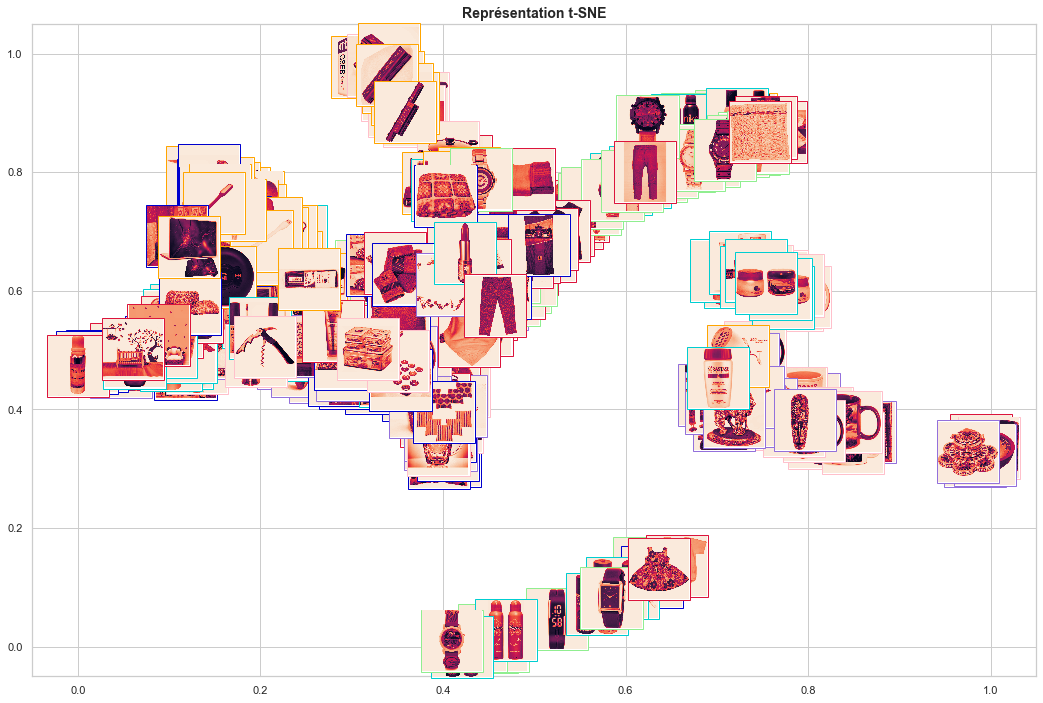

In [104]:
plot_embedding(X_tsne, data['process_img'], zoom=0.15, min_dist=10e-5, title='Représentation t-SNE')
#plt.ylim(-.05,0.8)
#plt.xlim(0.4,1)
plt.show()